# Stock Dynamics
#### By John Bobo based on a problem set from MIT’s Analytics Edge MOOC
#### April 27, 2016

A stock market is where buyers and sellers trade shares of a company, and is one of the most popular ways for individuals and companies to invest money. The size of the world stock market  is now estimated to be in the trillions. The largest stock market in the world is the New York Stock Exchange (NYSE), located in New York City. About 2,800 companies are listed on the NSYE. In this problem, we'll look at the monthly stock prices of five of these companies: [IBM](http://www.ibm.com/), [General Electric (GE)](http://www.ge.com/), [Procter and Gamble](http://www.pg.com/), [Coca Cola](http://www.coca-cola.com/), and [Boeing](http://www.boeing.com/). The data used in this problem comes from [Infochimps](http://www.infochimps.com/).

Download and read the following files into R, using the read.csv function: [IBMStock.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/IBMStock.csv), [GEStock.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/GEStock.csv), [ProcterGambleStock.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/ProcterGambleStock.csv), [CocaColaStock.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/CocaColaStock.csv), and [BoeingStock.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/BoeingStock.csv). (Do not open these files in any spreadsheet software before completing this problem because it might change the format of the Date field.)

Call the data frames "ibm", "ge", "pg", "coke", and "boeing", respectively. Each data frame has two variables, described as follows:

* **Date**: the date of the stock price, always given as the first of the month.  
* **StockPrice**: the average stock price of the cmopany in the given month.

## Loading the Data
Loading the data, we need to parse the dates appropriately.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

coke_file = "/Users/johnbobo/analytics_edge/data/CocaColaStock.csv"
ibm_file = "/Users/johnbobo/analytics_edge/data/IBMStock.csv"
ge_file = "/Users/johnbobo/analytics_edge/data/GEStock.csv"
pg_file = "/Users/johnbobo/analytics_edge/data/ProcterGambleStock.csv"
boeing_file = "/Users/johnbobo/analytics_edge/data/BoeingStock.csv"

coke = pd.read_csv(coke_file, parse_dates=[0], low_memory=False)
ibm = pd.read_csv(ibm_file, parse_dates=[0], low_memory=False)
ge = pd.read_csv(ge_file, parse_dates=[0], low_memory=False)
pg = pd.read_csv(pg_file, parse_dates=[0], low_memory=False)
boeing = pd.read_csv(boeing_file, parse_dates=[0], low_memory=False)

## Summary Statistics

**Our five datasets all have the same number of observations. How many observations are there in each data set?**

In [2]:
coke.shape[0]

480

**What is the earliest year in our datasets?**

In [3]:
min(coke.Date).strftime("%Y")

'1970'

**What is the latest year in our datasets?**

In [4]:
max(coke.Date).strftime("%Y")

'2009'

**What is the mean price of IBM over this period of time?**

In [5]:
np.mean(ibm.StockPrice)

144.3750303076664

**What is the minimum stock price of GE over this time period?**

In [6]:
min(ge.StockPrice)

9.2936363639999993

**What is the maximum stock price of Coca-Cola over this time period?**

In [7]:
max(coke.StockPrice)

146.58428569999998

**What is the median stock price of Boeing over this time period?**

In [8]:
np.median(boeing.StockPrice)

44.883398270000001

**What is the standard deviation of the stock price of Procter & Gamble over this time period?**

In [9]:
np.std(pg.StockPrice, ddof=1)

18.19414030797156

**Pro-Tip**: We can get most of this using `describe()`

In [10]:
pg.describe()

,StockPrice
count,480.000000
mean,77.704516
std,18.194140
min,46.884545
25%,62.478663
50%,78.336077
75%,89.468375
max,149.620000


## Visualizing Stock Dynamics

Let's start by getting all the info into a single dataframe and look at the top to make sure it looks right.

In [11]:
df = pd.concat([coke.Date, coke.StockPrice, ibm.StockPrice, ge.StockPrice, pg.StockPrice, boeing.StockPrice], \
              axis=1,keys = ['date', 'coke_price', 'ibm_price', 'ge_price', 'pg_price', 'boeing_price'])

In [12]:
df.head()

,date,coke_price,ibm_price,ge_price,pg_price,boeing_price
0,1970-01-01,83.368095,360.319048,74.253333,111.874286,27.853810
1,1970-02-01,81.591053,346.723684,69.976842,111.453684,22.381053
2,1970-03-01,81.338095,327.345714,72.158571,108.451429,23.105238
3,1970-04-01,76.805909,319.852727,74.252727,106.288636,21.571364
4,1970-05-01,69.278571,270.375238,66.665238,73.332857,18.932857


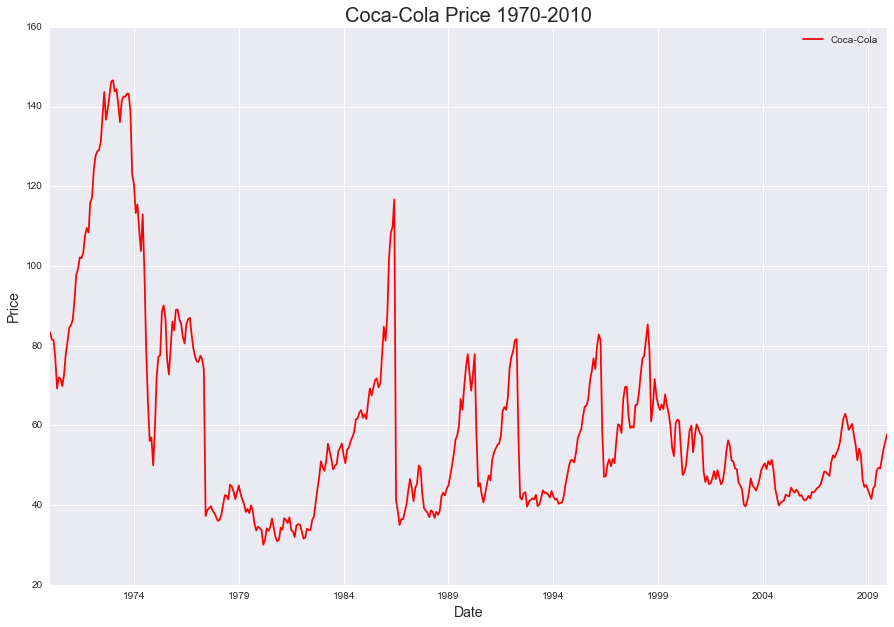

In [13]:
fig = df[['date', 'coke_price']].plot(x=df.date, color='red', figsize=(15,10))
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Coca-Cola'])
plt.title('Coca-Cola Price 1970-2010',fontsize=20);

We can see Coca-Cola had its highest stock price in 1973 and its lowest price in 1980.

Now let's add P&G to the graph.
**In March of 2000, the technology bubble burst, and a stock market crash occurred. According to this plot, which company's stock dropped more?** 
**Answer**: P&G

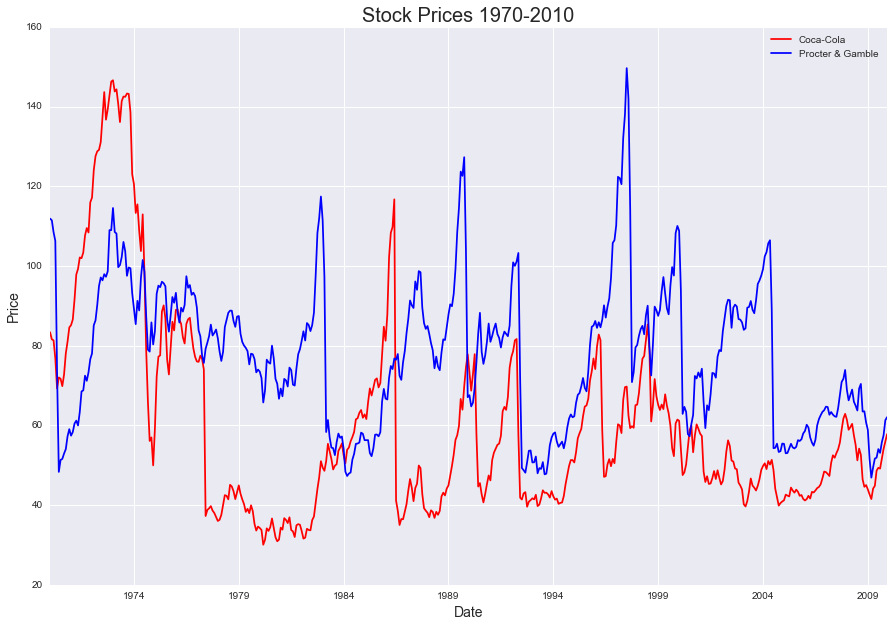

In [14]:
df[['date','coke_price', 'pg_price']].plot(x=df.date, color=['red','blue'], figsize=(15,10))
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Coca-Cola', 'Procter & Gamble'])
plt.title('Stock Prices 1970-2010', fontsize=20);

**Around 1983, the stock for one of these companies (Coca-Cola or Procter and Gamble) was going up, while the other was going down. Which one was going up?**  
**Answer**: Coca-Cola.

Just for fun we're going to look at all of the stocks on one graph.

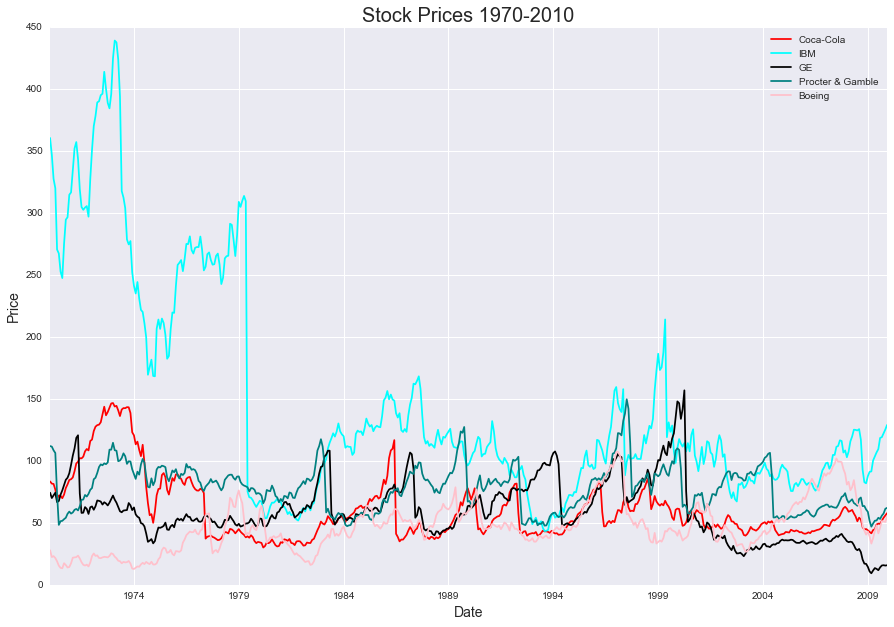

In [15]:
df.plot(x=df.date, color=['red','aqua','black','teal','pink'], figsize=(15,10))
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Coca-Cola', 'IBM','GE', 'Procter & Gamble', 'Boeing'])
plt.title('Stock Prices 1970-2010', fontsize=20);

## Visualizing Stock Dynamics 1995 - 2005

Let's take a look at how the stock prices changed from 1995-2005 for all five companies.

In [16]:
stocks95_05 = df[(df.date >= dt.datetime(1995,1,1)) & (df.date < dt.datetime(2005,1,1))]

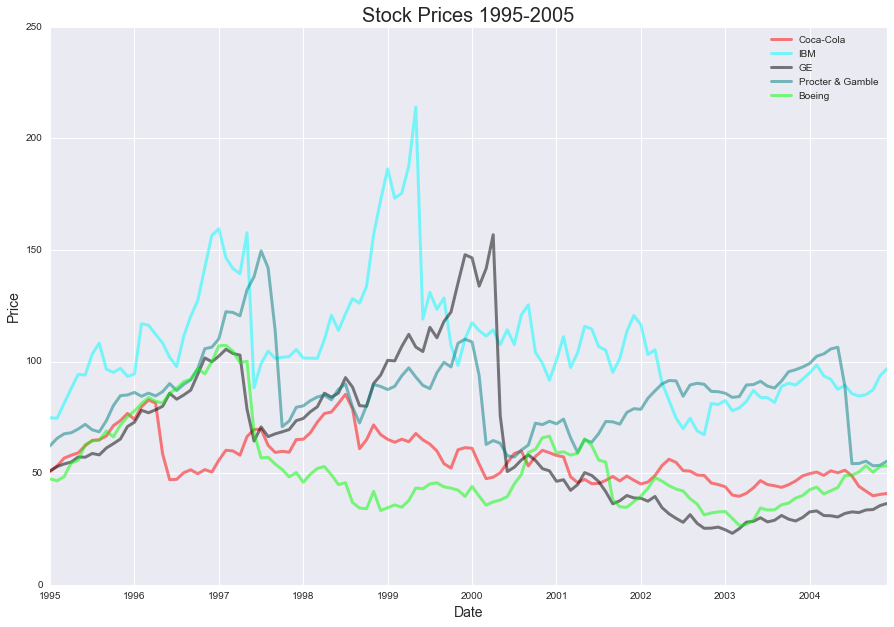

In [17]:
stocks95_05.plot(x=stocks95_05.date, linewidth=3, alpha=0.5, color=['red','aqua','black','teal','lime'], figsize=(15,10))
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Coca-Cola', 'IBM','GE', 'Procter & Gamble', 'Boeing'])
plt.title('Stock Prices 1995-2005', fontsize=20);

**Which stock fell the most right after the technology bubble burst in March 2000?**  
**Answer**: General Electric (GE).

***

**Which stock reaches the highest value in the time period 1995-2005?**  
**Answer**:IBM

***

**In October of 1997, there was a global stock market crash that was caused by an economic crisis in Asia. Comparing September 1997 to November 1997, which companies saw a decreasing trend in their stock price?**  
**Answer**: Boeing and Procter & Gamble.

***

**In the last two years of this time period (2004 and 2005) which stock seems to be performing the best, in terms of increasing stock price?**  
**Answer**: Boeing.

***

## Monthly Trends
Lastly, let's see if stocks tend to be higher or lower during certain months. Calculate the mean stock price of IBM, sorted by months.

In [18]:
months = pd.to_datetime(pd.DatetimeIndex(df.date).month, format = '%m')
df['month'] = months.strftime('%B')

In [19]:
df.groupby('month').agg({'ibm_price': 'mean'}).sort_values('ibm_price')

,ibm_price
month,
October,137.346553
November,138.018682
July,139.067018
September,139.088527
June,139.090676
August,140.145475
December,140.759310
January,150.238423
May,151.502194


**For IBM, compare the monthly averages to the overall average stock price. In which months has IBM historically had a higher stock price (on average)?**  
**Answer**: January, February, March, April, and May.

***

**For the months of December and January, every company's average stock is higher in one month and lower in the other. In which month are the stock prices lower?**  
**Answer**: December.